## Approximation des modes propres de l'équation de Schrödinger unidimensionnel

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy.linalg as npl 
import scipy.linalg as spl
import scipy.sparse.linalg as sspl

### Modes propres du Laplacien

#### 1.

Soit le problème suivant : 
$$
\left\{
    \begin{eqnarray}
        -u''(x)&=&Eu(x)&&\\
        u(-R)&=&u(R)&=&0
    \end{eqnarray}
\right.
$$

On cherche une solution de la forme :
$$
\begin{eqnarray}
    u(x)=a\cos(\omega x) + b\sin(\omega x)
\end{eqnarray}
$$

On y intègre les conditions aux limites :
$$
\left\{
    \begin{eqnarray}
        u(-R)&=&a\cos(-\omega R) + b\sin(-\omega R)&=&0\\
        u(R)&=&a\cos(\omega R) + b\sin(\omega R)&=&0
    \end{eqnarray}
\right.\\
$$
$$
\Leftrightarrow\left\{
    \begin{eqnarray}
        a\cos(\omega R) - b\sin(\omega R)&=&0\\
        a\cos(\omega R) + b\sin(\omega R)&=&0
    \end{eqnarray}
\right.\\
$$
$$
\Leftrightarrow\left\{
    \begin{eqnarray}
        a\cos(\omega R) &=&0\\
        b\sin(\omega R) &=&0
    \end{eqnarray}
\right.
$$

On peut donc différencier les cas : 
* $a=0$
    * $b=0$      
        $$u(x)=0$$
        
    * $b\neq 0$
        $$
            b\neq 0 \Rightarrow \sin(\omega R)=0 \Rightarrow \omega R = k\pi, k\in \mathbb{N} \Rightarrow u(x)=b\sin\left(\frac{k\pi}{R}x\right)=b\sin\left(\frac{k'\pi}{2R}x\right), k\in \mathbb{N}, k'\in \mathbb{N} \text{ pair}   
        $$
        
* $a\neq 0$
    $$
        a\neq 0 \Rightarrow \cos(\omega R)=0 \Rightarrow \sin(\omega R)\neq 0 \Rightarrow b=0\\
        \cos(\omega R)=0 \Rightarrow \omega R = \frac{\pi}{2}+k\pi, k\in \mathbb{N} \Rightarrow u(x)=a\cos\left(\frac{(2k+1)k\pi}{2R}x\right)=a\cos\left(\frac{k'\pi}{2R}x\right), k\in \mathbb{N}, k'\in \mathbb{N} \text{ impair}
    $$

Déterminons $a$ et $b$ :


On peut maintenant en déduire $u_{k'}$ pour tout $k'\in \mathbb{N}$. On a :
$$
\left\{
    \begin{eqnarray}
        u_{k'}(x)&=&a\cos\left(\frac{k'\pi}{2R}x\right),&k'\in \mathbb{N} \text{ impair}\\
        u_{k'}(x)&=&b\sin\left(\frac{k'\pi}{2R}x\right),&k'\in \mathbb{N} \text{ pair}
    \end{eqnarray}
\right.\\
$$
$$
\Leftrightarrow\left\{
    \begin{eqnarray}
        u_{k'}(x)&=&a\sin\left(\frac{k'\pi}{2R}x\right),&k'\in \mathbb{N} \text{ impair}\\
        u_{k'}(x)&=&b\sin\left(\frac{k'\pi}{2R}x\right),&k'\in \mathbb{N} \text{ pair}
    \end{eqnarray}
\right.\\
$$

#### 2.

On pose $u_0=u_{N+1}=\alpha$ et on a :
$$
\frac{-1}{h^2}u_{i-1} + \frac{2}{h^2}u_{i} + \frac{-1}{h^2}u_{i+1} = Eu_i, i=1..N
$$

On peut donc réécrire le système sous la forme :

$$
\begin{bmatrix} 
    1 & 0 & \dots & \dots & \dots & 0\\
    \frac{-1}{h^2} & \frac{2}{h^2} &\frac{-1}{h^2} & 0 & \dots & 0\\
    0 & \ddots & \ddots & \ddots & \ddots & \vdots\\
    \vdots & \ddots & \ddots & \ddots & \ddots & 0\\
    0 & \dots & 0 & \frac{-1}{h^2} & \frac{2}{h^2} &\frac{-1}{h^2}\\
    0 & \dots & \dots & \dots & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
    u_0\\
    u_1\\
    \vdots\\
    \vdots\\
    u_N\\
    u_{N+1}
\end{bmatrix}
=
\begin{bmatrix}
    \alpha\\
    Eu_1\\
    \vdots\\
    \vdots\\
    Eu_N\\
    \alpha
\end{bmatrix}
$$

$$
=
\begin{bmatrix} 
    \alpha & 0 & \dots & \dots & 0\\
    0 & 0 & \ddots & \ddots & \vdots\\
    \vdots & \ddots & \ddots & \ddots & \vdots\\
    \vdots & \ddots & \ddots & 0 & 0 \\
    0 & \dots & \dots & 0 & \alpha
\end{bmatrix}
+E
\begin{bmatrix} 
    0 & 0 & \dots & \dots & 0\\
    0 & 1 & \ddots &  \ddots & \vdots\\
    \vdots & \ddots & \ddots & \ddots & \vdots\\
    \vdots & \ddots &  \ddots & 1 & 0 \\
    0 & \dots & \dots & 0 & 0
\end{bmatrix}
$$

D'où, pour $\alpha=0$, BU=EDU avec :
$$
B=
\begin{bmatrix} 
    1 & 0 & \dots & \dots & \dots & 0\\
    \frac{-1}{h^2} & \frac{2}{h^2} &\frac{-1}{h^2} & 0 & \dots & 0\\
    0 & \ddots & \ddots & \ddots & \ddots & \vdots\\
    \vdots & \ddots & \ddots & \ddots & \ddots & 0\\
    0 & \dots & 0 & \frac{-1}{h^2} & \frac{2}{h^2} &\frac{-1}{h^2}\\
    0 & \dots & \dots & \dots & 0 & 1 
\end{bmatrix}
$$
$$
U=
\begin{bmatrix}
    u_0\\
    u_1\\
    \vdots\\
    \vdots\\
    u_N\\
    u_{N+1}
\end{bmatrix}
$$
$$
D=
\begin{bmatrix} 
    0 & 0 & \dots & \dots & 0\\
    0 & 1 & \ddots &  \ddots & \vdots\\
    \vdots & \ddots & \ddots & \ddots & \vdots\\
    \vdots & \ddots &  \ddots & 1 & 0 \\
    0 & \dots & \dots & 0 & 0
\end{bmatrix}
$$

#### 3.

En éliminant la première et la dernière ligne de B, U et D, ainsi que la première et la dernière colonne de B et D, on obtient : 

$$
\frac{1}{h^2}
\begin{bmatrix} 
    2 & -1 & 0 & \dots & 0\\
    -1 & \ddots & \ddots & \ddots & \vdots\\
    0 & \ddots & \ddots & \ddots & 0\\
    \vdots & \ddots & \ddots & \ddots & -1\\
    0 & \dots & 0 & -1 & 2
\end{bmatrix}
\begin{bmatrix}
    u_1\\
    \vdots\\
    \vdots\\
    \vdots\\
    u_N\\
\end{bmatrix}
=
E
\begin{bmatrix} 
    1 & 0 & \dots & 0\\
    0 & \ddots & \ddots & \vdots\\
    \vdots & \ddots & \ddots & 0\\
    0 & \dots & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
    u_1\\
    \vdots\\
    \vdots\\
    u_N\\
\end{bmatrix}
=
E
\begin{bmatrix}
    u_1\\
    \vdots\\
    \vdots\\
    u_N\\
\end{bmatrix}
$$

#### 4.

In [53]:
N = 9
R = 1
h = 2*R/(N+1)

x = np.linspace(-R+h,R-h,N)

A = 1/h**2 * (np.diag(np.repeat(2,N)) - np.diag(np.repeat(1,N-1),k=-1) - np.diag(np.repeat(1,N-1),k=1))

lbd, vec = np.linalg.eig(A)
tri_lbd = np.argsort(lbd)
lbd = lbd[tri_lbd]
vec = vec[:,tri_lbd]


k = 2
vk = vec[:,k-1]

uk = 1/np.sqrt(R)*np.sin(k*np.pi*(x+R)/2/R)

np.sign(vk[1])*uk/np.linalg.norm(uk)

array([-2.62865556e-01, -4.25325404e-01, -4.25325404e-01, -2.62865556e-01,
       -5.47678698e-17,  2.62865556e-01,  4.25325404e-01,  4.25325404e-01,
        2.62865556e-01])

In [54]:
vk

array([-2.62865556e-01, -4.25325404e-01, -4.25325404e-01, -2.62865556e-01,
       -3.21269062e-16,  2.62865556e-01,  4.25325404e-01,  4.25325404e-01,
        2.62865556e-01])

In [55]:
print(vk-uk/np.linalg.norm(uk))

[-5.25731112e-01 -8.50650808e-01 -8.50650808e-01 -5.25731112e-01
 -3.76036932e-16  5.25731112e-01  8.50650808e-01  8.50650808e-01
  5.25731112e-01]


#### 5.

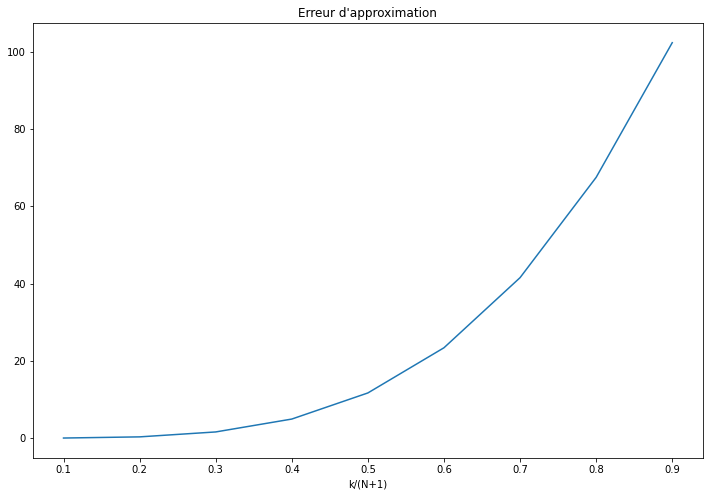

In [56]:
k_vec = np.linspace(1,N,N)
E = k_vec**2*np.pi**2/4/R**2

erreur_approx = np.abs(E-lbd)
plt.figure(figsize=(12,8))
plt.plot(k_vec/(N+1),erreur_approx)
plt.title('Erreur d\'approximation')
plt.xlabel('k/(N+1)')
plt.show()

On cherche une relation de la forme $$\varepsilon=\left|E_k-\lambda_k\right|=C+\frac{k}{N+1}e^\alpha$$

En faisant varier $\alpha$ et C, on trouve de bonnes valeurs de ces variables :

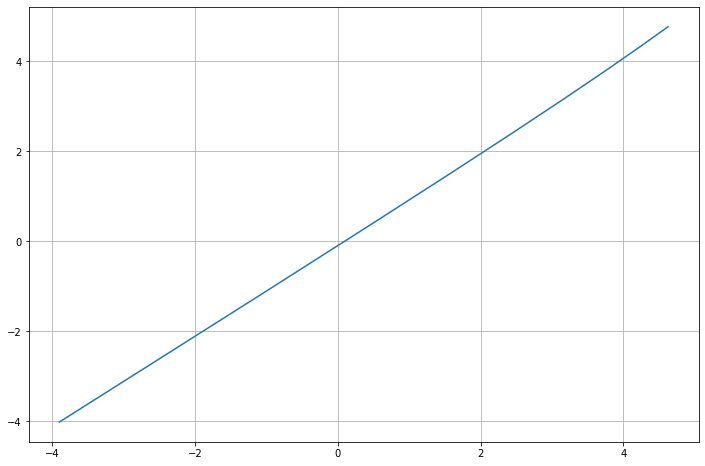

In [57]:
alpha = 4
C = 180
plt.figure(figsize=(12,8))
plt.plot(np.log(E-lbd),alpha*np.log(k_vec/(N+1))+np.log(C))
plt.grid()

En pratique les valeurs propres $(\lambda_k)_{1\leq{k} \leq{N}}$ de $A$ peuvent être calculées :

$$
    \lambda_k = \frac{4}{h^2} \sin^2\left(\frac{k\pi}{2(N+1)}\right)
$$

In [58]:
lbd_exact = 4*((N+1)*np.sin(np.arange(1,N+1)*np.pi/(2*(N+1))))**2
lbd_exact

array([  9.78869674,  38.19660113,  82.44294954, 138.19660113,
       200.        , 261.80339887, 317.55705046, 361.80339887,
       390.21130326])

In [59]:
lbd

array([ 2.44717419,  9.54915028, 20.61073739, 34.54915028, 50.        ,
       65.45084972, 79.38926261, 90.45084972, 97.55282581])

Je comprends pas ce qu'il veut qu'on fasse dans cette question ? faire la soustraction de la formule exacte avec nos vp et donner un condition ?

Je crois qu'on a un pb sur nos vps ?? en fait je comprends rien ici mdr

*Je crois qu'il a dit qu'il nous donnait juste la formule des $\lambda_k$ pour notre culture G*

Soit $\varepsilon$ la précision que l'on souhaite pour l'approximation des $M$ valeurs propres.
On a vu que l'erreur augmente avec $k$, on cherche donc $N$ tel que $\varepsilon=\left|E_M-\lambda_M\right|$
$$
\begin{eqnarray}
    &\varepsilon&=&C+\frac{M}{N+1}e^\alpha\\
    \Leftrightarrow&\frac{N+1}{M}&=&\frac{e^\alpha}{\varepsilon-C}\\
    \Leftrightarrow&N&=&\frac{Me^\alpha}{\varepsilon-C}-1
\end{eqnarray}
$$

Définissons $\epsilon$ la tolérance afin d'établir un critère sur $N$ pour lequel on peut donner les $M$ premières valeurs propre à $\epsilon$ près.

In [62]:
espilon = 1e-5


In [63]:
print(lbd-lbd_exact[:len(lbd)])

[  -7.34152256  -28.64745084  -61.83221216 -103.64745084 -150.
 -196.35254916 -238.16778784 -271.35254916 -292.65847744]


### Modes propres de l'opérateur de Schödinger

#### 1.

In [64]:
def V(x,V0=1.,a=R/2):
    if (a < 0) or (a > R) or (V0 < 0):
        raise ValueError("a doit être compris entre 0 et R, V0 doit être positif")
        
    return (np.abs(x) > a) * V0
V(0.6)

1.0

#### On pose $u_0=u_{N+1}=\alpha$ et on a :
$$
\frac{-1}{h^2}u_{i-1} + \frac{2}{h^2}u_{i} + \frac{-1}{h^2}u_{i+1} + V_iu_i= Eu_i, i=1..N
$$

En reprenant le travail mené aux questions 2 et 3 de la première partie du TP, on peut donc écrire le système sous la forme suivante : 

$$
\left(A+A_V\right)U=EU
$$
avec 
$$
A_V=
\begin{bmatrix} 
    I_d & 0 & 0\\
    0 & 0_{N-2d} & 0\\
    0 & 0 & I_d
\end{bmatrix}
$$

où $d=\frac{x_{i^*} + R}{h}$ avec $h=\frac{2R}{N+1}$ et $x_{i^*}$ la valeur inférieure à $a$ la plus proche de $a$

In [76]:
a = R/2
d = int(round((max(x[x < -a]) + R)/h))
A_V = np.eye(N)
A_V[d:N-d,:] = 0
A_V

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [79]:
A_V = np.zeros((N,N))
for i in range(N):
    A_V[i,i] = V(x[i],a=a)
A_V

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

#### 2.

In [95]:
def Puissance_inv(A,u_ini,espilon):
    n_iter = 0
    u_ini = u_ini/npl.norm(u_ini)
    P,L,U = spl.lu(A)
    l = espilon
    ltmp = 0
    while abs(l-ltmp)>epsilon*abs(l):
        n_iter += 1
        ltmp = l
        if n_iter>2*np.shape(A)[0]:
            break
        y = spl.solve_triangular(L,u_ini,lower = 1)
        z = spl.solve_triangular(U,y)
        l = np.dot(x,z)
        x = z/npl.norm(z)
    return 1./l,u_ini,n_iter

Pour calculer $d$ valeurs propres d'une même matrice symétrique, on peut à l'itération $k$ on effectuer l'algorithme de la puissance inverse sur $d$ vecteurs en même temps : $(x_1^k,x_2^k,..x_d^k)$. On calcule donc les vecteurs $$y_i^k=A x_i^k \text{ pour } i=1..d.$$ De plus, comme on sait qu'au final les vecteurs propres de $A$ sont orthogonaux, on orthonormalise les vecteurs $(y_1^k,y_2^k,..y_d^k)$ par un procédé  de Gram-Schmidt et on prend cette base orthonormalisée comme valeur de $(x_1^{k+1},x_2^{k+1},..x_d^{k+1})$.

In [79]:
def GramSchmidt(Y) :
    [n,p]=Y.shape
    for i in np.arange(p) :
        for j in np.arange(i) :
            Y[:,i]-=np.dot(Y[:,i],Y[:,j])*Y[:,j]
        Y[:,i]/=np.linalg.norm(Y[:,i])

In [102]:
def Laplacian(n) :
    return (n+1)**2*sp.sparse.diags([2*np.ones(n),-1*np.ones(n-1),-1*np.ones(n-1)], [0, -1, 1]).tocsc()


#on passe en entrée notre matrice
#le vecteur (ou matrice) u_ini qui va nous permettre d'approcher p vp
#espilon la tolérance accordée à l'algorithme
def Puissance_inv2(A,u,espilon):
    n_iter = 0
    GramSchmidt(u)
    p = np.shape(u)[1]
    l = espilon*np.ones((p,1))
    ltmp = np.zeros((p,1))
    while npl.norm(l-ltmp,np.inf)>espilon*npl.norm(ltmp,np.inf):
        n_iter += 1
        ltmp = l
        if n_iter>2*np.shape(A)[0]:
            break
        u = sspl.spsolve(A,u)
        GramSchmidt(u)
        B = u.T.dot(A.dot(u))
        l = np.diag(B)
    return l,u,n_iter

In [120]:
n = 10
p = 2
X = np.random.rand(n,p)
l,X,niter=Puissance_inv2(Laplacian(n),X,1e-6)
lexact = 4*((n+1)*np.sin(np.arange(1,n+1)*np.pi/(2*(n+1))))**2
print("Erreur entre les valeurs propres calculées et les valeurs propres exactes:")
print(l - lexact[0:p])

Erreur entre les valeurs propres calculées et les valeurs propres exactes:
[1.77635684e-15 3.63958542e-06]


TODO tracer la nos vp en fonction de h

#### 3.

TODO
Représenter sur le même graphique les fonctions propres de l’opérateur Laplacien et de l’opérateur de Schrödinger. Qu’observez-vous ?